<a href="https://colab.research.google.com/github/Veniverse/fake-job-prediction/blob/main/FAKE_JOB_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [ ]:
data = pd.read_csv('fake_job_postings.csv')

In [ ]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
data.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [ ]:
data.location=data.location.fillna('blank')

In [ ]:
data_US = data[data['location'].str.contains("US")]


In [ ]:
loc_split =[]
for loc in data_US.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[1, 2]]

loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [ ]:
len(data_US)/len(data)


0.5959731543624162

In [ ]:
data_US = data_US.reset_index()


In [ ]:
data_US = data_US.join(loc_split)


In [ ]:
data_US = data_US[['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'state', 'city']]

In [ ]:
data_US = data_US[data_US['city'].notna()]
data_US = data_US[data_US['state'].notna()]

In [ ]:
data_US.shape


(10593, 20)

In [ ]:
data_US['state_city'] = data_US['state'] + ", " + data_US['city']


In [ ]:
data_US.isna().sum()

,0
job_id,0
title,0
location,0
department,7567
salary_range,9064
company_profile,2037
description,0
requirements,1745
benefits,4639
telecommuting,0


In [ ]:
data_US.city = data_US.city.str.strip()
data_US.state = data_US.state.str.strip()

In [ ]:
data_US

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,NY,New York,"NY, New York"
1,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,IA,Wever,"IA, Wever"
2,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,MD,,"MD,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,...,0,Full-time,NaN,NaN,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco"
10652,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,...,0,Contract,NaN,NaN,Utilities,NaN,0,NC,Charlotte,"NC, Charlotte"
10653,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,,,","
10654,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia"


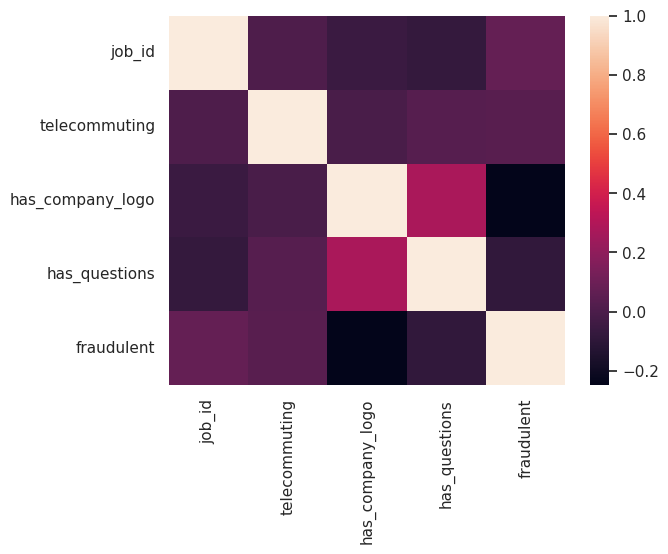

In [ ]:
numeric_data = data_US.select_dtypes(include=np.number)
corr = numeric_data.corr()
sns.heatmap(corr)
plt.show()

In [ ]:
len(data_US[data_US.fraudulent == 0]), len(data_US[data_US.fraudulent == 1]),


(9868, 725)

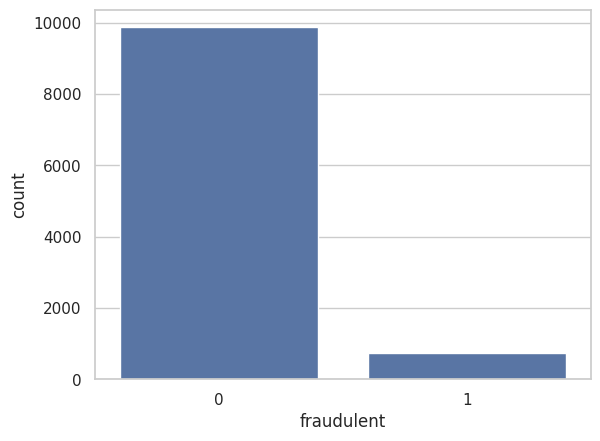

In [ ]:
sns.countplot(x='fraudulent', data=data_US);


In [ ]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=data_US, hue="fraudulent",
              order=data_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

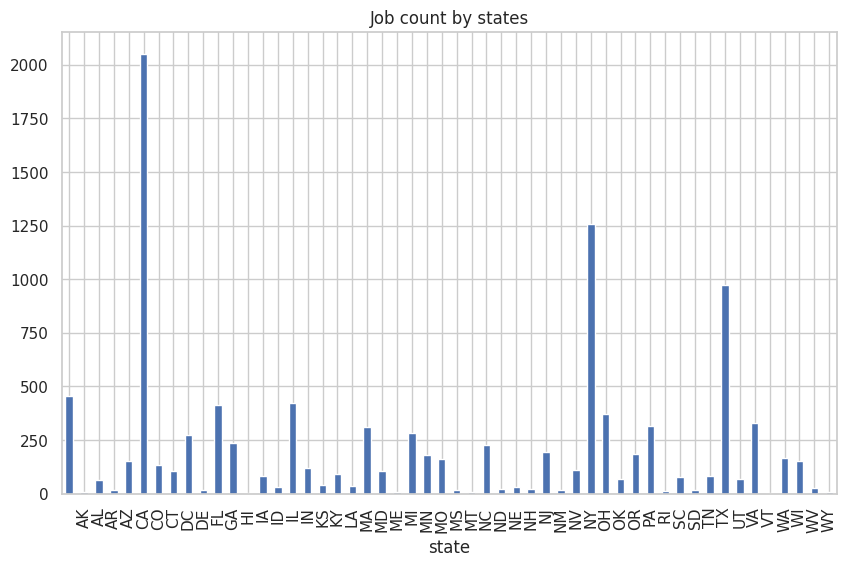

In [ ]:
plt.figure(figsize=(10,6))
data_US.groupby('state').fraudulent.count().plot(kind='bar', title='Job count by states');

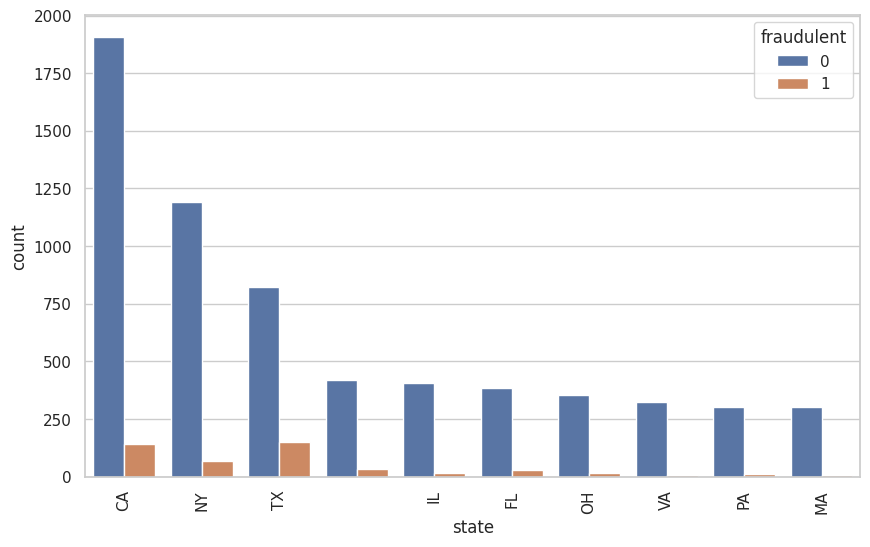

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='state', data=data_US, hue="fraudulent", order=data_US['state'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

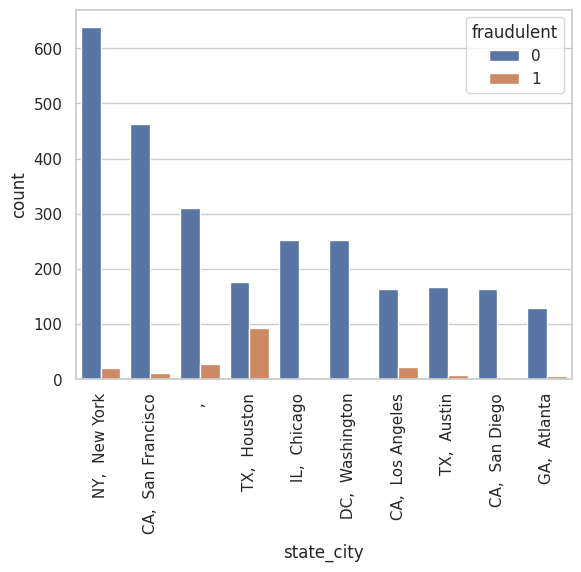

In [ ]:
sns.countplot(x='state_city', data=data_US, hue="fraudulent", order=data_US['state_city'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=data_US, hue="fraudulent",
              order=data_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title(title)
    plt.show()

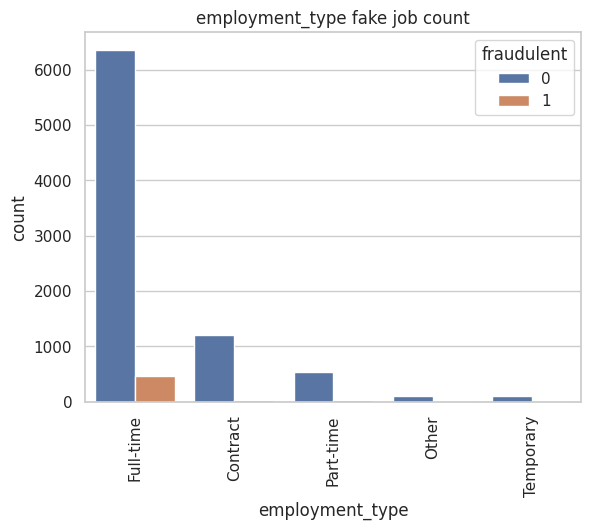

In [ ]:
sns_countplot('employment_type');

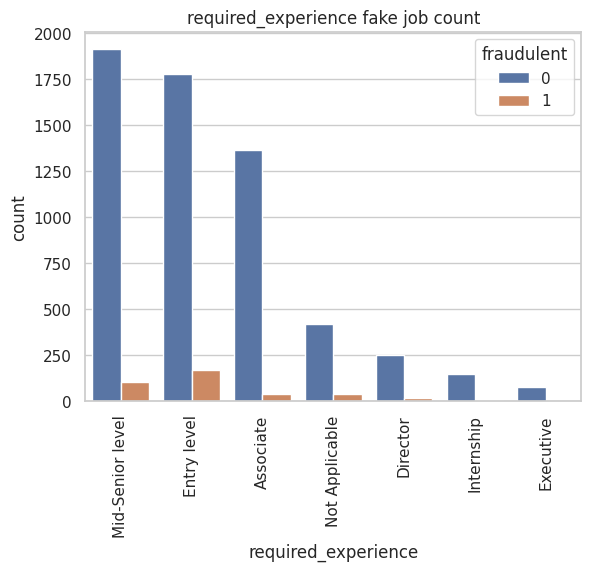

In [ ]:
sns_countplot('required_experience');

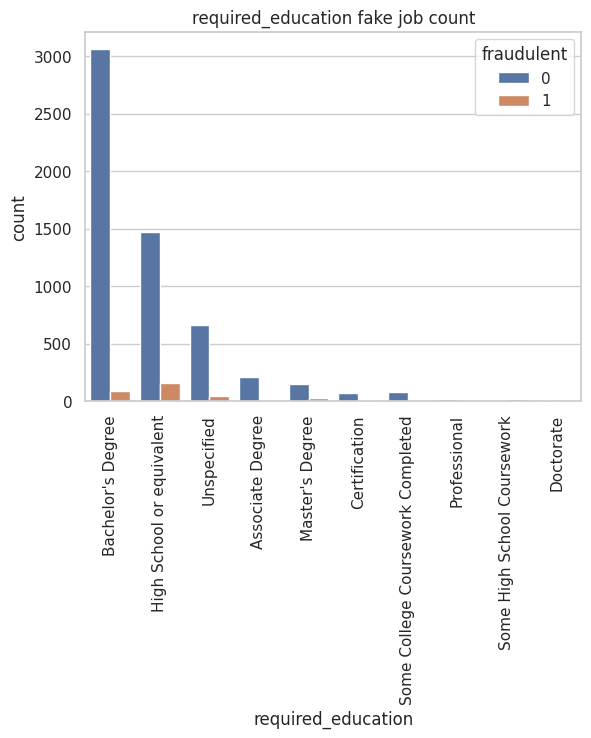

In [ ]:
sns_countplot('required_education');

In [ ]:
location_ratio = round(data_US[data_US.fraudulent == 1].groupby('state_city').state_city.count()/data_US[data_US.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})

In [ ]:
data_US = data_US.merge(location_ratio)


In [ ]:
data_US.ratio.fillna(0, inplace=True)


<ipython-input-32-e3101c492e24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_US.ratio.fillna(0, inplace=True)


In [ ]:
location_ratio_plot = location_ratio[location_ratio.ratio >= 1]

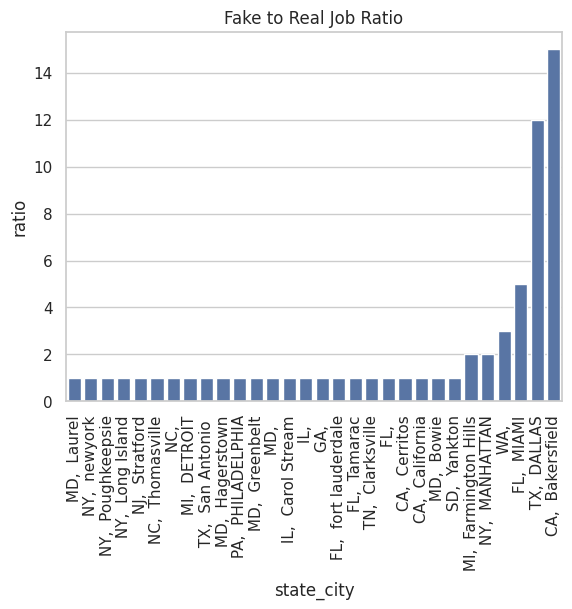

In [ ]:
sns.barplot(data=location_ratio_plot.sort_values(by='ratio'), x='state_city', y='ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

In [ ]:
def missing_count(feature, title='None'):
    y_axis = data_US[data_US[feature].isna()][['fraudulent', feature]]
    y_axis = y_axis.fraudulent.value_counts()
    y_axis.plot(kind='bar')
    plt.ylabel('Count')
    plt.xlabel('Category')
    title = "Number of empty " + title + " in fraudulent and non-fraudulent"
    plt.title(title)
    plt.xticks(rotation=0)
    plt.show()
    return 0

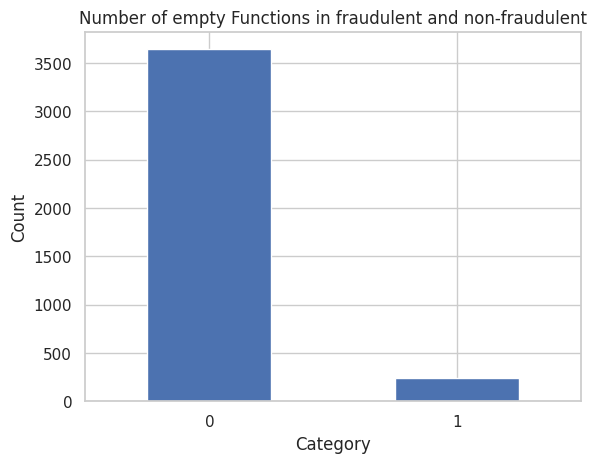

0

In [ ]:
missing_count('function', 'Functions')


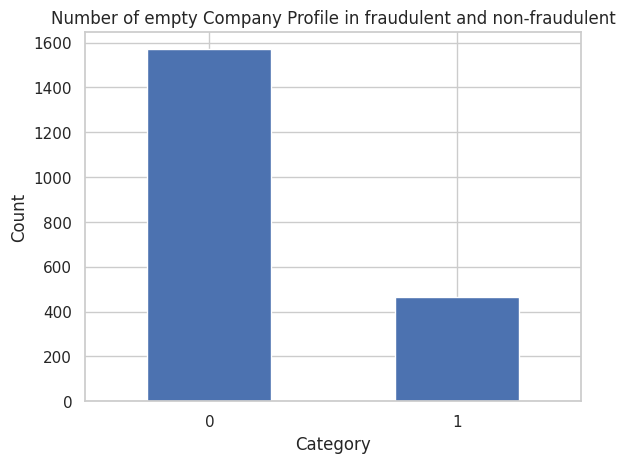

0

In [ ]:
missing_count('company_profile', 'Company Profile')

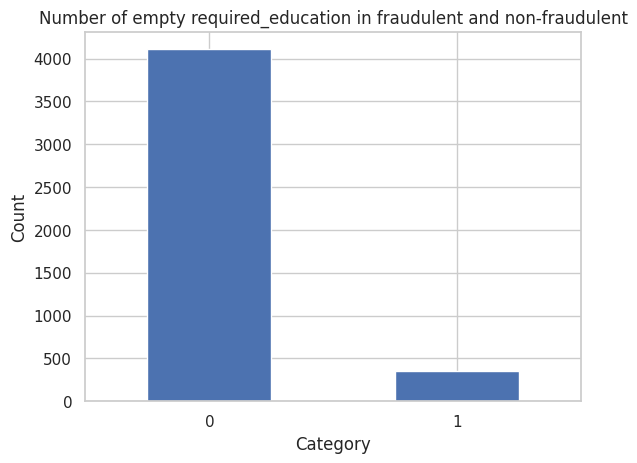

0

In [ ]:
missing_count('required_education', 'required_education')

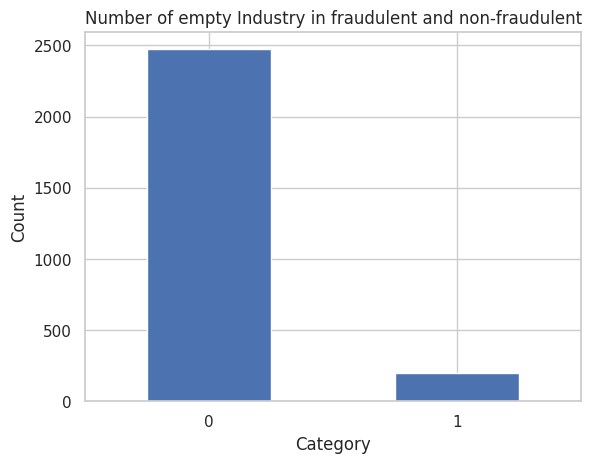

0

In [ ]:
missing_count('industry', 'Industry')

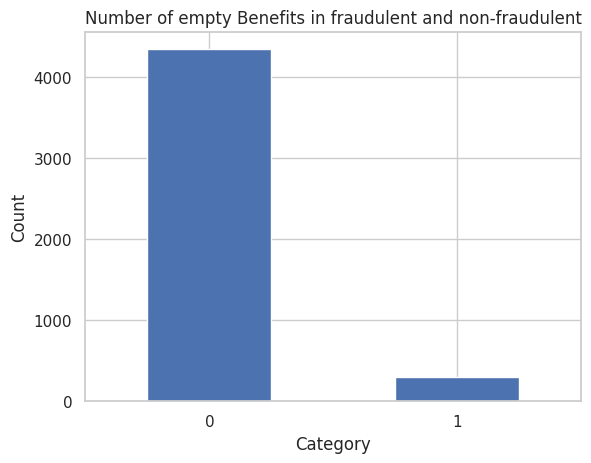

0

In [ ]:
missing_count('benefits', 'Benefits')

In [ ]:
telecommuting_list = []
has_company_logo_list = []

for idx, tel, logo in zip(range(len(data_US)), data_US.telecommuting, data_US.has_company_logo):
    if data.fraudulent[idx] == 1:
        telecommuting_list.append(tel)
        has_company_logo_list.append(logo)
    else:
        pass

telecommuting_logo_df = pd.DataFrame({'telecommuting':telecommuting_list, 'has_company_logo':has_company_logo_list})

In [ ]:
fake_count = 0

for fraud, tel, logo in zip(data_US.fraudulent, data_US.telecommuting, data_US.has_company_logo):
    if (tel == 0 and logo == 0):
        if (fraud == 1):
            fake_count +=1
        else:
            pass
    else:
        pass


print(fake_count)

425


In [ ]:
fake_count = 0

for fraud, tel, logo, ques in zip(data_US.fraudulent, data_US.telecommuting, data_US.has_company_logo, data_US.has_questions):
    if (tel == 0):# and logo == 0 and ques == 0):
        if (fraud == 1):
            fake_count +=1
        else:
            pass
    else:
        pass


print(fake_count)

667


In [ ]:
len(data_US[data_US.fraudulent == 1])

725

In [ ]:
667/725

0.92

In [ ]:

fake_count/len(data_US[data_US.fraudulent == 1]) * 100

92.0

In [ ]:
data_US.fillna(" ",inplace = True)

data_US['text'] =  data_US['title'] + ' ' + data_US['location'] + ' ' + data_US['company_profile'] + ' ' + \
        data_US['description'] + ' ' + data_US['requirements'] + ' ' + data_US['benefits'] + ' ' + \
        data_US['required_experience'] + ' ' + data_US['required_education'] + ' ' + data_US['industry'] + ' ' + data_US['function']


data_US.drop(['job_id', 'department', 'salary_range', 'title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function', 'city', 'state_city', 'has_company_logo', 'has_questions', 'state'], axis = 1, inplace = True)

In [ ]:
data_US

,telecommuting,fraudulent,ratio,text
0,0,0,0.03,"Marketing Intern US, NY, New York We're Food52..."
1,0,0,0.00,"Commissioning Machinery Assistant (CMA) US, IA..."
2,0,0,0.01,"Account Executive - Washington DC US, DC, Wash..."
3,0,0,0.00,"Bill Review Manager US, FL, Fort Worth SpotSou..."
4,0,0,1.00,"Accounting Clerk US, MD, Job OverviewApex i..."
...,...,...,...,...
10588,0,0,0.02,"Product Manager US, CA, San Francisco Flite de..."
10589,0,0,0.03,"Recruiting Coordinator US, NC, Charlotte RES..."
10590,0,0,0.09,"JavaScript Developer US, , Sr, JavaScript D..."
10591,0,0,0.05,"Payroll Accountant US, PA, Philadelphia WebLin..."


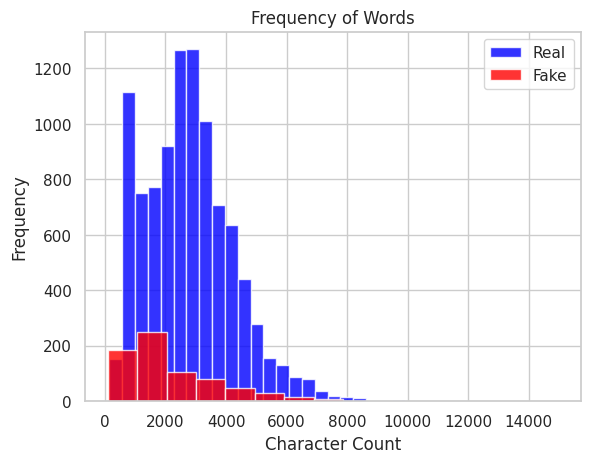

In [ ]:
data_US['character_count'] = data_US.text.apply(len)

data_US[data_US.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue',
                                       label='Real', alpha=0.8)
data_US[data_US.fraudulent==1].character_count.plot(kind='hist', color='red',
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

In [ ]:
data_US

,telecommuting,fraudulent,ratio,text,character_count
0,0,0,0.03,"Marketing Intern US, NY, New York We're Food52...",2705
1,0,0,0.00,"Commissioning Machinery Assistant (CMA) US, IA...",2663
2,0,0,0.01,"Account Executive - Washington DC US, DC, Wash...",5540
3,0,0,0.00,"Bill Review Manager US, FL, Fort Worth SpotSou...",4047
4,0,0,1.00,"Accounting Clerk US, MD, Job OverviewApex i...",3458
...,...,...,...,...,...
10588,0,0,0.02,"Product Manager US, CA, San Francisco Flite de...",2664
10589,0,0,0.03,"Recruiting Coordinator US, NC, Charlotte RES...",2102
10590,0,0,0.09,"JavaScript Developer US, , Sr, JavaScript D...",584
10591,0,0,0.05,"Payroll Accountant US, PA, Philadelphia WebLin...",4825


# **Text Analysis**

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [ ]:
import nltk
nltk.download('punkt_tab')
text = data_US.text.to_list()
text = ' '.join(text)
tokens_text = word_tokenize(text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
lower_tokens = [t.lower() for t in tokens_text]
word_freq = Counter(lower_tokens)
print(Counter.most_common(word_freq, 10))

[(',', 248538), ('and', 217658), ('to', 122845), ('the', 109318), ('.', 105032), ('of', 86305), ('a', 79631), ('in', 69807), ('with', 52173), ('for', 49748)]


In [ ]:
text_only_alphabets = [t for t in lower_tokens if t.isalpha()]


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopped = stopwords.words('english')
no_stops = [t for t in text_only_alphabets if t not in english_stopped]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized)
print(Counter.most_common(bow, 10))

[nltk_data] Downloading package wordnet to /root/nltk_data...


[('service', 22304), ('experience', 22284), ('work', 20787), ('customer', 19040), ('team', 18650), ('company', 17228), ('u', 17062), ('business', 13857), ('client', 13012), ('sale', 11779)]


In [ ]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Now you can save the DataFrame to the CSV file
data_US.to_csv('data/fake_job_postings_clnd.csv')


In [ ]:
data_US.shape

(10593, 5)

**Model**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
fake_job_postings = pd.read_csv('data/fake_job_postings_clnd.csv')

In [ ]:
X = fake_job_postings[['telecommuting', 'ratio', 'text', 'character_count']]
y = fake_job_postings['fraudulent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [ ]:
X_train_num = X_train[['telecommuting', 'ratio', 'character_count']]
X_test_num = X_test[['telecommuting', 'ratio', 'character_count']]

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train.text)
tfidf_test = tfidf_vectorizer.transform(X_test.text)

In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

***Naive Bayes***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)

0.9708237986270023

In [ ]:
metrics.f1_score(y_test, pred)

0.7301587301587301

In [ ]:
from sklearn.linear_model import SGDClassifier

# Change 'log' to 'log_loss'
clf_log = SGDClassifier(loss='log_loss').fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.977974828375286

***SGDClassifier***

In [ ]:
from sklearn.linear_model import SGDClassifier

# 'log' is deprecated, use 'log_loss' instead
clf_num = SGDClassifier(loss='log_loss').fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

0.9364988558352403

In [ ]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)

In [ ]:
metrics.accuracy_score(y_test, prediction_array)

0.977974828375286

In [ ]:
metrics.f1_score(y_test, prediction_array)

0.8229885057471265

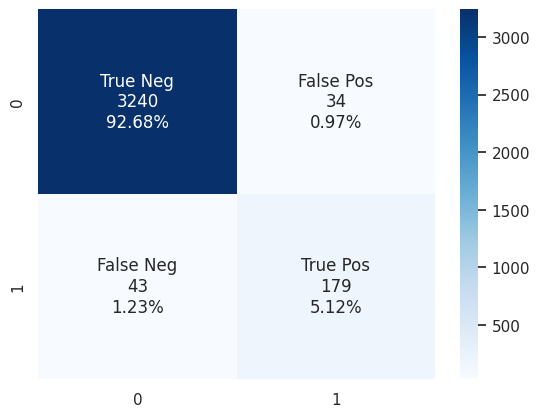

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_test' and 'prediction_array' hold the true and predicted labels respectively
cf_matrix = confusion_matrix(y_test, prediction_array)

group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
len(y_test[y_test == 0]), len(y_test[y_test == 1])


(3274, 222)